<h1 style="color:green" align="center">Handwritten Digits Classification Using Neural Network</h1>


We will classify handwritten digits with the neural network in this notebook. Firstly, we will use very simple newral network which will have only input and output layers. Then we will than add a hidden layer and observe the performance of the model improves. Finally analyze the performance of all models.

So we will build flowing THREE models:
- Model-1: Simple neural network with no hidden layers
- Model-2: Using hidden layer in the neural network
- Model-3: Using flatten layer technique without using ``.reshape`` on input dataset


# Table of Contents
 
* [Introduction](#introduction) 
 
* [Import essential pakages](#import_pakages)
 
* [Prepare our data](#data_preparation)

 * [Normalize data](#normalize_data)

* [Build the models](#build_models)
  * [Model-1: Simple neural network with no hidden layers](#model1)
   * [Confusion matrix for model-1](#model1_confusion_matrix)
  * [Model-2: Using hidden layer in the neural network](#model2)
   * [Confusion matrix for model-2](#model2_confusion_matrix)
  * [Model-3: Using flatten layer technique without using .reshape on input dataset](#model3)
   * [Confusion matrix for model-3](#model3_confusion_matrix)
* [Save the Model and Load the model back](#save) 
 

`` Summary:``

- Challenges: 
- What we did: 
- The outcome and benefits:
- <p style="color:magenta" align="left">Future work:</p> 

 - Use different ``activation`` function, ``loss`` function, ``optimizer``, ``epochs`` and different values of ``matrics``, then analyze how the model behave.

    
`` Note:`` This problem is chosen as a toy problem - to practice and learn the neural network.

## Introduction and Background Materials 
<a id="#introduction" > </a>


The artificial neuron, loosely modeled off of a neuron in the human brain, simply hosts the mathematical computations. Like our neurons, it triggers when it encounters sufficient stimuli. The neuron combines input from the data with a set of coefficients, or weights, that either amplify or dampen that input, which thereby assigns significance to inputs for the task the algorithm is trying to learn. See each part of the neuron in action in the next image <a url = "https://www.mql5.com/en/forum/380098">[ref]</a>:

<img src ="artificialneuron.gif"/>

The idea is to take a large number of handwritten digits, known as training examples, and then develop a system which can learn from those training examples. In other words, the neural network uses the examples to automatically infer rules for recognizing handwritten digits.

``Data: `` The MNIST data set is used.

``Dense Layer: `` If a neuron is connected all neuron in the next layer then we call dense layer.

For more details see the [notes on neural network](./Notes_on_artificial_neural_network.ipynb).

Ref: <a url = "https://www.mql5.com/en/forum/380098"> Image source is here. </a>

## Import essential pakages
<a id="import_pakages"/>

In [3]:
import tensorflow as tf            
import tensorflow.keras as keras  # deep learning library, tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('tensorflow version:',tf.__version__)

tensorflow version: 2.3.0


## Prepare our data
<a id = "#data_preparation"></a>

- We use the mnist dataset. The mnist dataset of hand-written digits, 0 through 9, and 28x28 images of these hand-written digits. 
- The x_train data is the "features." The features are pixel values of the 28x28 images of these digits 0-9. 
- The y_train is the label (0,1,2,3,4,5,6,7,8 or 9)

In [4]:
mnist = keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

print('len(X_train)=',len(x_train))
print('len(X_test)=',len(x_test))
print('Size of image=',x_train[0].shape)
# print('\nx_train[0] = ',x_train[0])

len(X_train)= 60000
len(X_test)= 10000
Size of image= (28, 28)


- Display the first image in x_train 

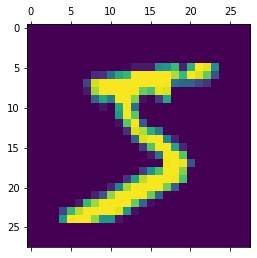

In [7]:
plt.matshow(x_train[0])  # Display the first image in X_train 

In [31]:
print('First digit = ',y_train[0])

First digit =  5


### Normalize data
<a id= "#normalize_data"/>

- Generally a good idea to "normalize" our data.
- Ex: Scaling the data to be between 0 and 1, or maybe -1 and positive 1

In [39]:
x_train = keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = keras.utils.normalize(x_test, axis=1)    # scales data between 0 and 1

# Equivalently
# x_train = x_train / 255
# x_test = x_test / 255

print('x_train[0] = ',x_train[0])

x_train[0] =  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0. 

- Flattened the x_train and x_test data

In [42]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

x_train_flattened.shape

(60000, 784)

## Build the models
<a id="#build_models"></a>

We will build THREE models:
- Model-1: Simple neural network with no hidden layers 
- Model-2: Using hidden layer in the neural network 
- Model-3: Using Flatten layer so that we don't have to call .reshape on input dataset

<h3 style='color:purple'> Model-1: Simple neural network with no hidden layers </h3>
<a id="#model1"></a>

<img src="digits_nn.jpg" />

In [83]:
model = keras.Sequential([                                            # sequential model for  direct order, a basic feed-forward model
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   # Simplest neural network layer, which is just a Dense layer, and the output layer. Output layer has 10 nodes. 1 node per possible number prediction.  
])                                                                     # No hidden layer

# -------------Alternative way -----------
# model = keras.models.Sequential()               # sequential model for  direct order, a basic feed-forward model
# model.add(keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'))  # Final layer or the output layer has 10 nodes. 1 node per possible number prediction. 

# compile the model 
model.compile(optimizer='adam',                       # Default optimizer to start with
              loss='sparse_categorical_crossentropy', # Calculate our "error". Neural network aims to minimize 
              metrics=['accuracy'])                   # Merices

model.fit(x_train_flattened, y_train, epochs=5)       # Fit or Train the model

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6462 - accuracy: 0.8557
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3461 - accuracy: 0.9049
Epoch 3/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.3106 - accuracy: 0.9128
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.9179
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9200


#### Model evaluate using test data

In [92]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate for sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)   # model's accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9710
0.0952460765838623
0.9710000157356262


#### Predict the model

In [55]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([5.1064428e-05, 4.1093215e-05, 1.5001950e-01, 1.8766522e-04,
       1.8446640e-11, 5.0207973e-04, 4.1472912e-04, 5.8538103e-13,
       5.3105185e-05, 1.4432262e-10], dtype=float32)

In [52]:
# finds a maximum element of an array and returns it's index
np.argmax(y_predicted[1])

2

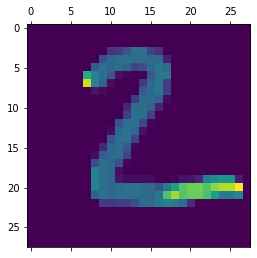

In [58]:
# Actual test image
plt.matshow(x_test[1])

In [62]:
# All predicted digits
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

#### Compute the confution matrix and display the matrix
<a id="#model1_confusion_matrix"></a>

- Q. Why do we need confusion matrix?
 - Ans: To evaate the performance of a model. It show the comparison between the predicted vs truth values. 
 - Anything except the diagonal of the confusion matrix are ERROR.
 - Example: If you look at the second column of the confusion matrix figure: 
   - In cell (2,2): our model 1110 time predicted 1 (as shown in the horizontal label), and the truth value is 1 (as shown in the vertical label)
   - In cell (3,1): our model predicted 1 for 6 times, but the truth value is 2. 

In [65]:
cmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    1,    0,    6,    8,    3,    5,    0],
       [   0, 1110,    4,    1,    0,    3,    4,    0,   13,    0],
       [   9,    6,  914,   22,   12,    2,   12,   11,   41,    3],
       [   3,    0,   15,  931,    1,   20,    2,    9,   21,    8],
       [   1,    1,    6,    1,  929,    0,   10,    3,    8,   23],
       [   8,    1,    6,   39,    6,  757,   17,    8,   45,    5],
       [  15,    3,   11,    1,   11,   12,  899,    0,    6,    0],
       [   2,    5,   28,    8,    7,    0,    0,  950,    2,   26],
       [   5,    5,    8,   29,   11,   26,    8,   11,  864,    7],
       [   8,    6,    4,   11,   34,    9,    0,   24,    9,  904]])>

Text(69.0, 0.5, 'Truth')

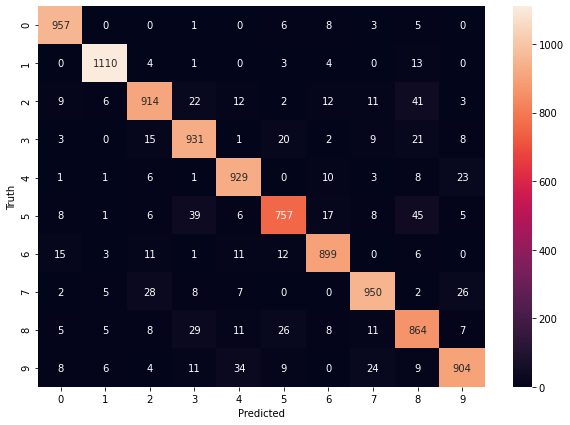

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Model-2: Using one hidden layer in the neural network </h3>
<a id="#model2"></a>

<img src="3-layer-nn.png" />
 



- Q. How many nurons do we chose for the hidden layer?
 - Ans: It is a trial and error method, Need more study about it.
 
Ref: <a url = "http://neuralnetworksanddeeplearning.com/chap1.html#perceptrons"> Image source is here. </a>

In [82]:
model = keras.Sequential([                                            # sequential model for  direct order, a basic feed-forward model
    keras.layers.Dense(15, input_shape=(784,),activation='relu'),    # Simplest neural network layer, which is just a Dense layer. This layer has 128 units [which is the hidden layes]. The activation function is relu. 
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   # Final layer or the output layer has 10 nodes. 1 node per possible number prediction. 
])

# -------------Alternative way -----------
# model = keras.models.Sequential()               # sequential model for  direct order, a basic feed-forward model
# model.add(keras.layers.Dense(128, input_shape=(784,), activation='relu'))  # Simplest neural network layer, which is just a Dense layer. This layer has 128 units [which is the hidden layes]. The activation function is relu.                                
# model.add(keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'))  # Final layer or the output layer has 10 nodes. 1 node per possible number prediction. 


# compile the model 
model.compile(optimizer='adam',                       # Default optimizer to start with
              loss='sparse_categorical_crossentropy', # Calculate our "error". Neural network aims to minimize 
              metrics=['accuracy'])                   # Merices

model.fit(x_train_flattened, y_train, epochs=5)       # Fit or Train the model

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3311 - accuracy: 0.9100
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1499 - accuracy: 0.9554
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9798


#### Model evaluate using test data

In [91]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate for sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)   # model's accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9710
0.0952460765838623
0.9710000157356262


#### Predict the model

In [71]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([5.0411154e-07, 3.2931566e-04, 2.4915585e-01, 1.0989277e-05,
       5.3910365e-16, 1.1813792e-05, 5.3376596e-08, 6.2998012e-13,
       4.4459206e-08, 1.8766130e-12], dtype=float32)

In [72]:
# finds a maximum element of an array and returns it's index
np.argmax(y_predicted[1])

2

In [78]:
# All predicted labels/digits
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

#### Compute the confution matrix and display the matrix
<a id="#model2_confusion_matrix"></a>


In [75]:
cmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    0,    3,    2,    1,    0],
       [   0, 1120,    4,    0,    0,    0,    3,    1,    7,    0],
       [   6,    1, 1008,    5,    2,    0,    3,    3,    4,    0],
       [   1,    1,    1,  989,    3,    4,    0,    4,    5,    2],
       [   2,    0,    3,    1,  967,    0,    3,    0,    2,    4],
       [   3,    1,    1,   17,    1,  853,    6,    0,    8,    2],
       [  12,    2,    2,    0,    5,    2,  933,    0,    2,    0],
       [   3,    6,   12,    4,    5,    0,    0,  995,    0,    3],
       [  11,    1,    4,   12,    5,    2,    4,    3,  927,    5],
       [   5,    6,    0,    9,   16,    2,    0,    4,    3,  964]])>

Text(69.0, 0.5, 'Truth')

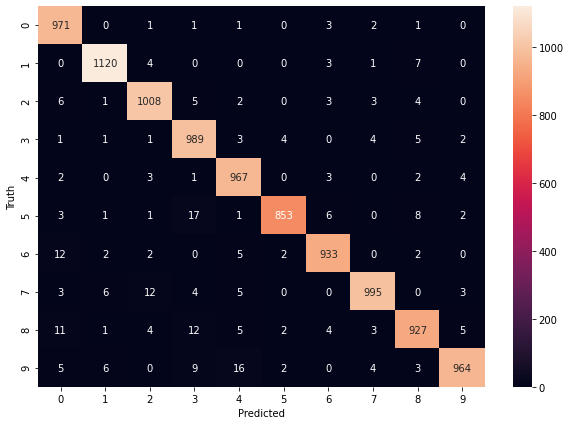

In [77]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<a id="#model3"></a>
<h3 style='color:purple'>Model-3: Using Flatten layer so that we do not have to call .reshape on input dataset</h3>

In [97]:
model = keras.Sequential([                          # sequential model for  direct order, a basic feed-forward model
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),    # Simplest neural network layer, which is just a Dense layer. This layer has 128 units [which is the hidden layes]. The activation function is relu. 
    keras.layers.Dense(10, activation='sigmoid')   # Final layer or the output layer has 10 nodes. 1 node per possible number prediction. 
])

                                                      # compile the model 
model.compile(optimizer='adam',                       # Default optimizer to start with
              loss='sparse_categorical_crossentropy', # Calculate our "error". Neural network aims to minimize 
              metrics=['accuracy'])                   # Merices

model.fit(x_train, y_train, epochs=5)               # Fit or Train the model

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.9071
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1609 - accuracy: 0.9519
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1132 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0856 - accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0683 - accuracy: 0.9801


#### Model evaluate using test data

In [98]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate for sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)   # model's accuracy

313/313 [==============================] - 0s 962us/step - loss: 0.0938 - accuracy: 0.9712
0.09383531659841537
0.9711999893188477


#### Compute the confution matrix and display the matrix
<a id="#model3_confusion_matrix"></a>


Text(69.0, 0.5, 'Truth')

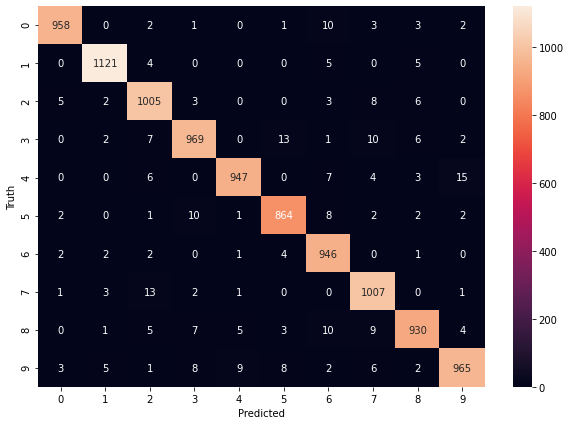

In [106]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style='color:purple'> Save the Model and Load the model back </h2>

<h3 style='color:purple'> Save the Model</h3>
<a id="#save"></a>

In [104]:
model.save('digit_recognition.model')

INFO:tensorflow:Assets written to: digit_recognition.model\assets


<h3 style='color:purple'> Load the model back and make predictions </h3>


In [105]:
new_model = keras.models.load_model('digit_recognition.model')
predictions = new_model.predict(x_test)
print(predictions)

[[1.3025196e-09 3.4425038e-10 3.5091564e-06 ... 8.2765305e-01
  3.5415155e-08 2.0322167e-08]
 [4.3754467e-09 1.0893287e-04 5.9734619e-01 ... 5.2248236e-12
  8.6807155e-08 4.4559693e-13]
 [3.2848636e-08 9.4586104e-02 2.5381027e-05 ... 1.7706718e-05
  3.0745359e-05 7.0456437e-08]
 ...
 [2.8663780e-11 4.8599178e-09 3.8353414e-09 ... 1.0712723e-05
  1.5426984e-05 1.4156103e-04]
 [1.8388205e-09 2.6757670e-07 1.9394644e-09 ... 2.1651896e-07
  8.3768368e-04 4.6585891e-09]
 [2.1647497e-07 6.7941412e-09 1.3408674e-06 ... 7.1998396e-10
  2.8064308e-08 2.0115722e-09]]


#### Check our prediction and inputed test image

7


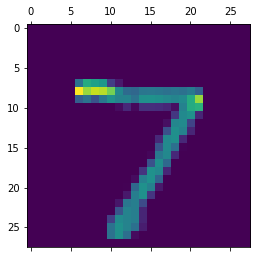

In [110]:
print(np.argmax(predictions[0])) # prediction
plt.matshow(x_test[0])           # Input/Actual test image

Text(69.0, 0.5, 'Truth')

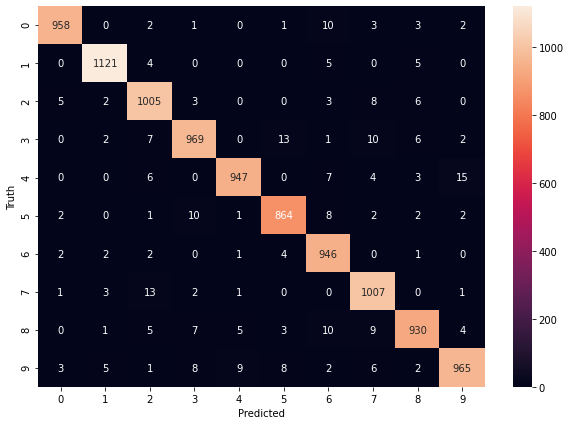

In [107]:
# Compute the confution matrix and display the matrix

y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cmatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')